# QT Analysis: Participant 7

In [2]:
# Load packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import (train_test_split, GridSearchCV, cross_val_score)
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [50, 100, 200, 300] }

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)

{'n_estimators': 50}


In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42, n_estimators=50)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf = rf.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", rf.score(X_test, y_test))

y_pred = rf.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.97244094 0.95669291 0.98031496 0.98023715 0.97233202]
Mean accuracy: 0.9724035977716226
Test set accuracy: 0.9748201438848921
              precision    recall  f1-score   support

         sad       0.99      0.95      0.97        79
       anger       0.95      0.99      0.97        79
        fear       0.97      0.97      0.97        80
     neutral       1.00      1.00      1.00        40

    accuracy                           0.97       278
   macro avg       0.98      0.98      0.98       278
weighted avg       0.98      0.97      0.97       278



Confusion matrix, without normalization
[[75  3  1  0]
 [ 0 78  1  0]
 [ 1  1 78  0]
 [ 0  0  0 40]]
Normalized confusion matrix
[[0.94936709 0.03797468 0.01265823 0.        ]
 [0.         0.98734177 0.01265823 0.        ]
 [0.0125     0.0125     0.975      0.        ]
 [0.         0.         0.         1.        ]]


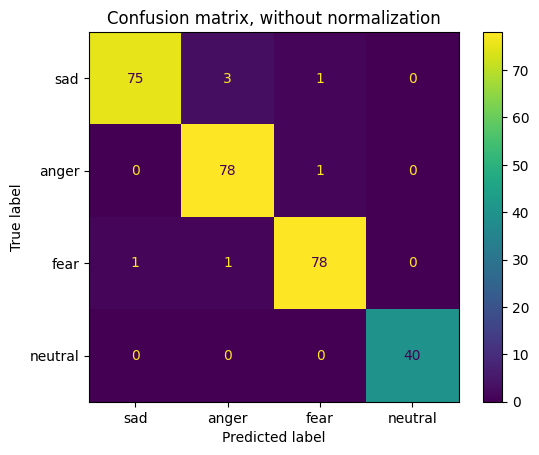

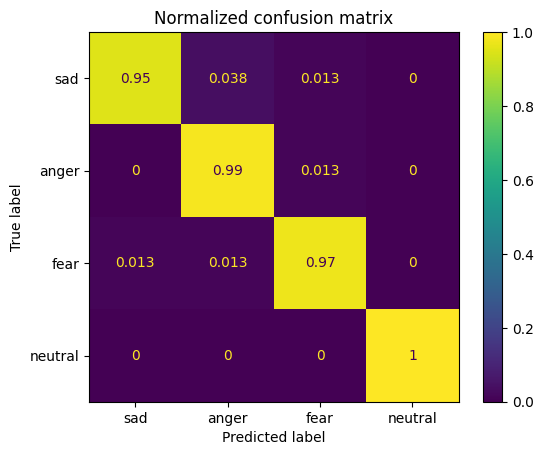

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"hidden_layer_sizes": [(5,2)],
              "alpha": [0.0001, 0.001, 0.01],
              "learning_rate": ["constant", "adaptive"]}

mlp = MLPClassifier(random_state=42, max_iter=500000)
grid_search_mlp = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
print(grid_search_mlp.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


In [23]:
# Multi-layer perceptron 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

mlp = MLPClassifier(random_state=42, solver="lbfgs", alpha=0.001, hidden_layer_sizes=(5,2), max_iter=50000)
cv_scores = cross_val_score(mlp, X_train, y_train, cv=5)
mlp = mlp.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", mlp.score(X_test, y_test))

y_pred = mlp.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.8503937  0.83858268 0.95275591 0.85770751 0.81027668]
Mean accuracy: 0.8619432946375774
Test set accuracy: 0.8453237410071942
              precision    recall  f1-score   support

         sad       0.77      0.82      0.80        79
       anger       0.87      0.82      0.84        79
        fear       0.88      0.85      0.87        80
     neutral       0.88      0.93      0.90        40

    accuracy                           0.85       278
   macro avg       0.85      0.86      0.85       278
weighted avg       0.85      0.85      0.85       278



Confusion matrix, without normalization
[[65  6  8  0]
 [ 8 65  1  5]
 [11  1 68  0]
 [ 0  3  0 37]]
Normalized confusion matrix
[[0.82278481 0.07594937 0.10126582 0.        ]
 [0.10126582 0.82278481 0.01265823 0.06329114]
 [0.1375     0.0125     0.85       0.        ]
 [0.         0.075      0.         0.925     ]]


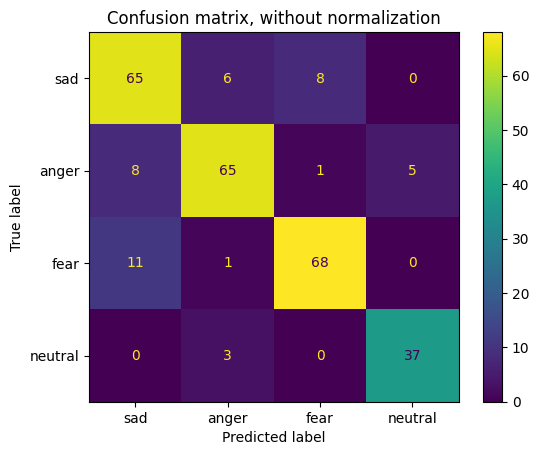

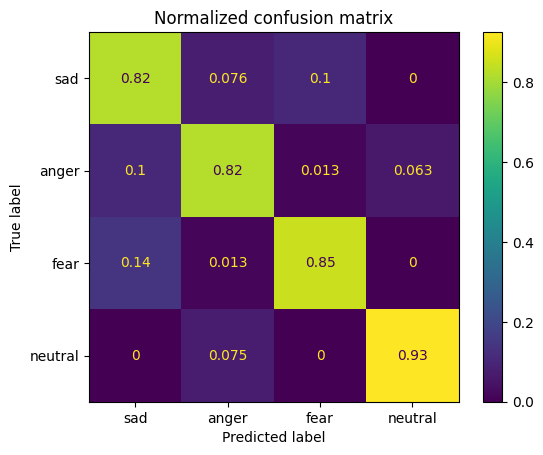

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        mlp,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {"svc__C": [0.1, 1, 10],
              "svc__kernel": ["linear", "rbf"],
              "svc__gamma": ["scale", "auto"]}

svm = make_pipeline(StandardScaler(), SVC(random_state=42))
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
print(grid_search_svm.best_params_)

{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [25]:
# Support Vector Machine
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm = make_pipeline(StandardScaler(), SVC(random_state=42, gamma="scale", C=10, kernel="rbf"))
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm = svm.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", svm.score(X_test, y_test))

y_pred = svm.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.99606299 0.97637795 0.98031496 0.98814229 0.98418972]
Mean accuracy: 0.9850175842644175
Test set accuracy: 0.9820143884892086
              precision    recall  f1-score   support

         sad       0.97      0.99      0.98        79
       anger       0.97      0.97      0.97        79
        fear       0.99      0.99      0.99        80
     neutral       1.00      0.97      0.99        40

    accuracy                           0.98       278
   macro avg       0.98      0.98      0.98       278
weighted avg       0.98      0.98      0.98       278



Confusion matrix, without normalization
[[78  0  1  0]
 [ 2 77  0  0]
 [ 0  1 79  0]
 [ 0  1  0 39]]
Normalized confusion matrix
[[0.98734177 0.         0.01265823 0.        ]
 [0.02531646 0.97468354 0.         0.        ]
 [0.         0.0125     0.9875     0.        ]
 [0.         0.025      0.         0.975     ]]


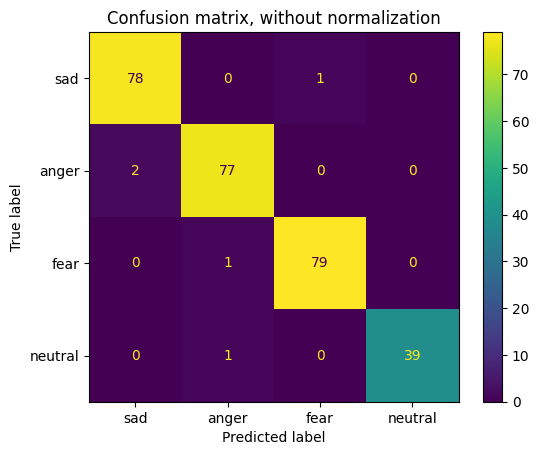

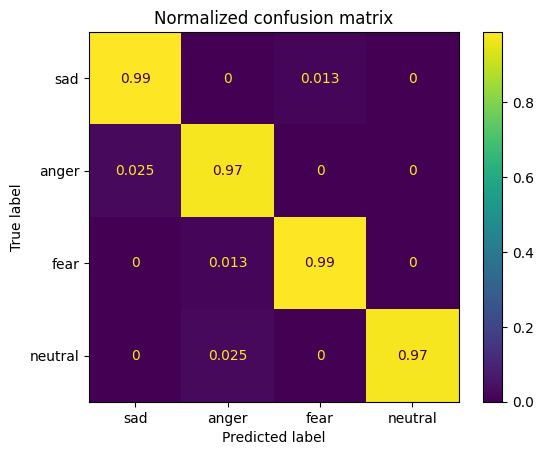

In [26]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import ConfusionMatrixDisplay

# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Data preparation with session 4 as a test set

In [5]:
# Create empty lists to store the data
sad_data13 = []
anger_data13 = []
fear_data13 = []
neutral_data13 = []

# Add the data together
for x in range(1, 4):
    df_sad13 = pd.read_csv("Data/Session{}/7/sad.csv".format(x))
    df_anger13 = pd.read_csv("Data/Session{}/7/anger.csv".format(x))
    df_fear13 = pd.read_csv("Data/Session{}/7/fear.csv".format(x))
    sad_data13.append(df_sad13)
    anger_data13.append(df_anger13)
    fear_data13.append(df_fear13)
    if x == 3:
        df_neutral13 = pd.read_csv("Data/Session{}/7/neutral.csv".format(x))
        neutral_data13.append(df_neutral13)
        
# Create empty lists for session to store the data for test set
sad_data4 = []
anger_data4 = []
fear_data4 = []
neutral_data4 = []

df_sad4 = pd.read_csv("Data/Session4/7/sad.csv")
df_anger4 = pd.read_csv("Data/Session4/7/anger.csv")
df_fear4 = pd.read_csv("Data/Session4/7/fear.csv")
df_neutral4 = pd.read_csv("Data/Session4/7/neutral.csv")
sad_data4.append(df_sad4)
anger_data4.append(df_anger4)
fear_data4.append(df_fear4)
neutral_data4.append(df_neutral4)

In [6]:
# Encode labels
for x in sad_data13:
    x.iloc[:, 0] = 0
    
for x in anger_data13:
    x.iloc[:, 0] = 1
    
for x in fear_data13:
    x.iloc[:, 0] = 2
    
for x in neutral_data13:
    x.iloc[:, 0] = 3
    
    # Encode labels
for x in sad_data4:
    x.iloc[:, 0] = 0
    
for x in anger_data4:
    x.iloc[:, 0] = 1
    
for x in fear_data4:
    x.iloc[:, 0] = 2
    
for x in neutral_data4:
    x.iloc[:, 0] = 3

In [7]:
# Copy the neutral data so that it will be equal to the other classes
combined_data13 = sad_data13 + anger_data13 + fear_data13 + neutral_data13
all_data13 = []

for x in combined_data13:
    for y in range(len(x.values)):
        all_data13.append(x.values[y])
        
# Copy the neutral data so that it will be equal to the other classes
combined_data4 = sad_data4 + anger_data4 + fear_data4 + neutral_data4
all_data4 = []

for x in combined_data4:
    for y in range(len(x.values)):
        all_data4.append(x.values[y])

In [8]:
# Shuffle data
random.seed(42)
random.shuffle(all_data13)
random.shuffle(all_data4)

In [9]:
y_train = []
X_train = []
for data in all_data13:
    # Extract labels and append to y
    label = data[0]
    y_train.append(label)
    # Extract feature points and append to X
    data2 = data[1:]
    # Normalize data between 0 and 1
    normalized = (data2 - np.min(data2)) / (np.max(data2) - np.min(data2))
    X_train.append(normalized)
    
y_test = []
X_test = []
for data in all_data4:
    # Extract labels and append to y
    label = data[0]
    y_test.append(label)
    # Extract feature points and append to X
    data2 = data[1:]
    # Normalize data between 0 and 1
    normalized = (data2 - np.min(data2)) / (np.max(data2) - np.min(data2))
    X_test.append(normalized)

In [10]:
# Make sure all values in the arrays are float to prevent future warnings
X_train = [np.array(x, dtype=float) for x in X_train]
X_test = [np.array(x, dtype=float) for x in X_test]

In [11]:
# Use smote to fix imbalances
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

C:\Users\selma\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [12]:
# Check if each class is equally represented in y_train
count0 = 0
count1 = 0
count2 = 0
count3 = 0

for x in y_train:
    if x == 0:
        count0 += 1
    elif x == 1:
        count1 += 1
    elif x == 2:
        count2 += 1
    elif x == 3:
        count3 += 1

print(f"Label 0: {count0}")
print(f"Label 1: {count1}")
print(f"Label 2: {count2}")
print(f"Label 3: {count3}")

Label 0: 297
Label 1: 297
Label 2: 297
Label 3: 297


## Train models with session 4 as test set

### Logistic Regression

In [10]:
param_grid = {"solver": ["lbfgs", "liblinear", "newton-cg"]}

lr = LogisticRegression(random_state=42, max_iter=5000)
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_)

{'solver': 'newton-cg'}


In [10]:
lr = LogisticRegression(random_state=42, max_iter=5000, solver="newton-cg")
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr = lr.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", lr.score(X_test, y_test))

y_pred = lr.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.8487395  0.7394958  0.74789916 0.78902954 0.78481013]
Mean accuracy: 0.781994823245754
Test set accuracy: 0.3409090909090909
              precision    recall  f1-score   support

         sad       0.38      0.94      0.54        99
       anger       0.13      0.13      0.13        99
        fear       0.59      0.20      0.30        99
     neutral       0.64      0.09      0.16        99

    accuracy                           0.34       396
   macro avg       0.43      0.34      0.28       396
weighted avg       0.43      0.34      0.28       396



Confusion matrix, without normalization
[[93  3  3  0]
 [78 13  3  5]
 [77  2 20  0]
 [ 0 84  8  7]]
Normalized confusion matrix
[[0.93939394 0.03030303 0.03030303 0.        ]
 [0.78787879 0.13131313 0.03030303 0.05050505]
 [0.77777778 0.02020202 0.2020202  0.        ]
 [0.         0.84848485 0.08080808 0.07070707]]


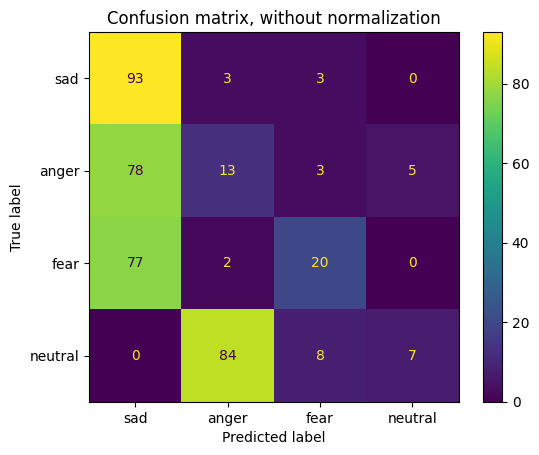

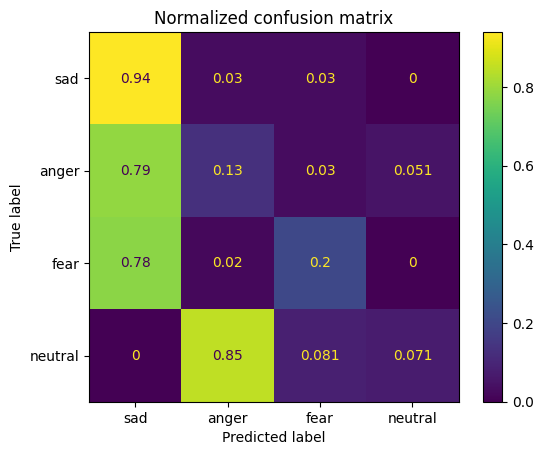

In [13]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lr,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Random Forest

In [14]:
param_grid = {"n_estimators": [50, 100, 200, 300] }

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)

{'n_estimators': 50}


In [12]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=50)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf = rf.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", rf.score(X_test, y_test))

y_pred = rf.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.98319328 0.9789916  0.97478992 0.98734177 0.97890295]
Mean accuracy: 0.9806439031308726
Test set accuracy: 0.2474747474747475
              precision    recall  f1-score   support

         sad       0.03      0.01      0.02        99
       anger       0.34      0.96      0.50        99
        fear       0.00      0.00      0.00        99
     neutral       0.33      0.02      0.04        99

    accuracy                           0.25       396
   macro avg       0.18      0.25      0.14       396
weighted avg       0.18      0.25      0.14       396



Confusion matrix, without normalization
[[ 2 96  0  1]
 [ 0 96  1  2]
 [11 88  0  0]
 [ 5  5 87  2]]
Normalized confusion matrix
[[0.02020202 0.96969697 0.         0.01010101]
 [0.         0.96969697 0.01010101 0.02020202]
 [0.11111111 0.88888889 0.         0.        ]
 [0.05050505 0.05050505 0.87878788 0.02020202]]


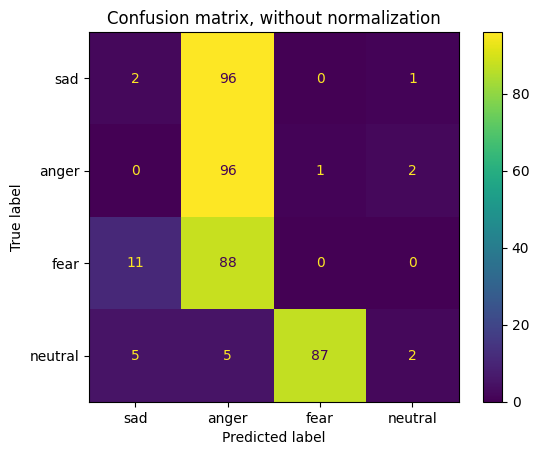

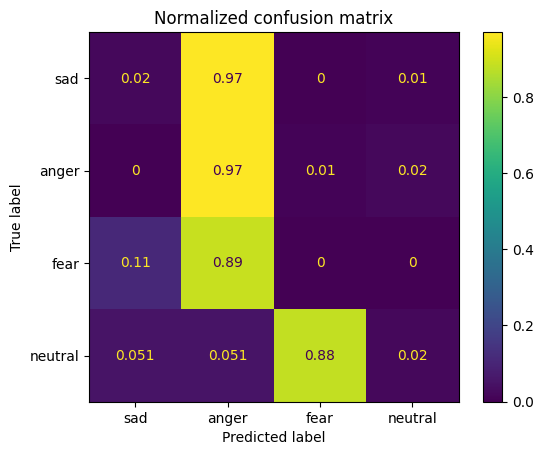

In [17]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Multi-layer perceptron 

In [18]:
param_grid = {"hidden_layer_sizes": [(5,2)],
              "alpha": [0.0001, 0.001, 0.01],
              "learning_rate": ["constant", "adaptive"]}

mlp = MLPClassifier(random_state=42, max_iter=500000)
grid_search_mlp = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
print(grid_search_mlp.best_params_)

{'alpha': 0.01, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


In [18]:
# Multi-layer perceptron 
mlp = MLPClassifier(random_state=42, solver="lbfgs", alpha=0.01, hidden_layer_sizes=(5,2), max_iter=1000000)
cv_scores = cross_val_score(mlp, X_train, y_train, cv=5)
mlp = mlp.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", mlp.score(X_test, y_test))

y_pred = mlp.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

C:\Users\selma\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Cross-validation scores: [0.89495798 0.64705882 0.4789916  0.88607595 0.24894515]
Mean accuracy: 0.6312059000815515
Test set accuracy: 0.5050505050505051
              precision    recall  f1-score   support

         sad       0.42      0.98      0.59        99
       anger       1.00      0.04      0.08        99
        fear       0.00      0.00      0.00        99
     neutral       0.96      1.00      0.98        99

    accuracy                           0.51       396
   macro avg       0.60      0.51      0.41       396
weighted avg       0.60      0.51      0.41       396



Confusion matrix, without normalization
[[97  0  2  0]
 [33  4 58  4]
 [99  0  0  0]
 [ 0  0  0 99]]
Normalized confusion matrix
[[0.97979798 0.         0.02020202 0.        ]
 [0.33333333 0.04040404 0.58585859 0.04040404]
 [1.         0.         0.         0.        ]
 [0.         0.         0.         1.        ]]


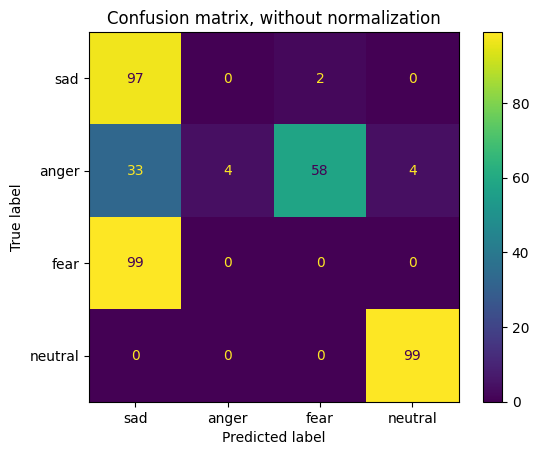

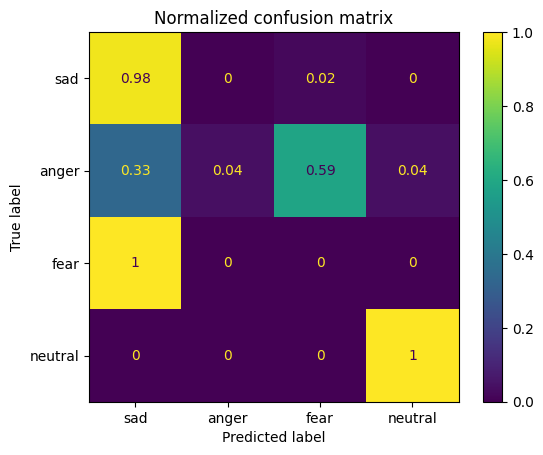

In [20]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        mlp,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Support Vector Machine

In [21]:
param_grid = {"svc__C": [0.1, 1, 10],
              "svc__kernel": ["linear", "rbf"],
              "svc__gamma": ["scale", "auto"]}

svm = make_pipeline(StandardScaler(), SVC(random_state=42))
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
print(grid_search_svm.best_params_)

{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [16]:
# Support Vector Machine
svm = make_pipeline(StandardScaler(), SVC(random_state=42, gamma="scale", C=10, kernel="rbf"))
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm = svm.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", svm.score(X_test, y_test))

y_pred = svm.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.98739496 0.99159664 0.98319328 0.99156118 0.98312236]
Mean accuracy: 0.9873736836506755
Test set accuracy: 0.2676767676767677
              precision    recall  f1-score   support

         sad       0.19      0.24      0.21        99
       anger       0.48      0.82      0.60        99
        fear       0.00      0.00      0.00        99
     neutral       0.50      0.01      0.02        99

    accuracy                           0.27       396
   macro avg       0.29      0.27      0.21       396
weighted avg       0.29      0.27      0.21       396



Confusion matrix, without normalization
[[24 75  0  0]
 [15 81  2  1]
 [88 11  0  0]
 [ 0  2 96  1]]
Normalized confusion matrix
[[0.24242424 0.75757576 0.         0.        ]
 [0.15151515 0.81818182 0.02020202 0.01010101]
 [0.88888889 0.11111111 0.         0.        ]
 [0.         0.02020202 0.96969697 0.01010101]]


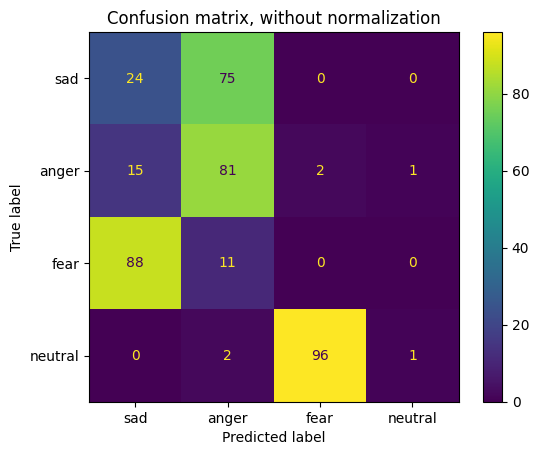

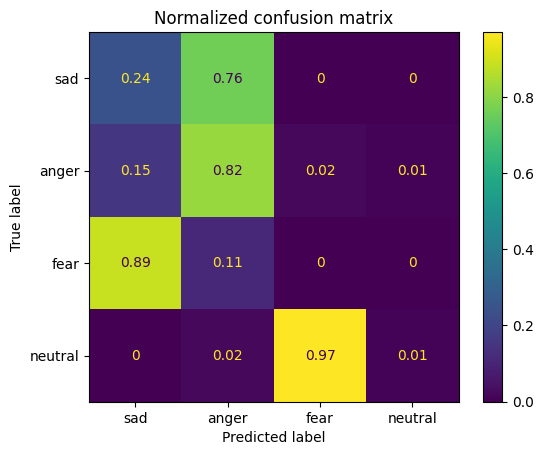

In [23]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

### K-nearest neighbors

In [14]:
param_grid = {"n_neighbors": [1, 2, 3, 4, 5]}

knn = KNeighborsClassifier()
grid_search_lr = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_)

{'n_neighbors': 1}


In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
knn = knn.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", knn.score(X_test, y_test))

y_pred = knn.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division = 0))

Cross-validation scores: [0.97478992 0.98319328 0.9789916  0.98734177 0.99156118]
Mean accuracy: 0.9831755487004928
Test set accuracy: 0.25
              precision    recall  f1-score   support

         sad       0.00      0.00      0.00        99
       anger       0.34      0.97      0.50        99
        fear       0.03      0.01      0.01        99
     neutral       1.00      0.02      0.04        99

    accuracy                           0.25       396
   macro avg       0.34      0.25      0.14       396
weighted avg       0.34      0.25      0.14       396



Confusion matrix, without normalization
[[ 0 99  0  0]
 [ 1 96  2  0]
 [23 75  1  0]
 [51 14 32  2]]
Normalized confusion matrix
[[0.         1.         0.         0.        ]
 [0.01010101 0.96969697 0.02020202 0.        ]
 [0.23232323 0.75757576 0.01010101 0.        ]
 [0.51515152 0.14141414 0.32323232 0.02020202]]


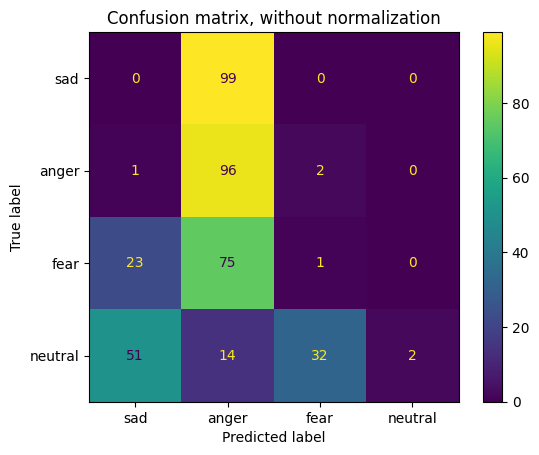

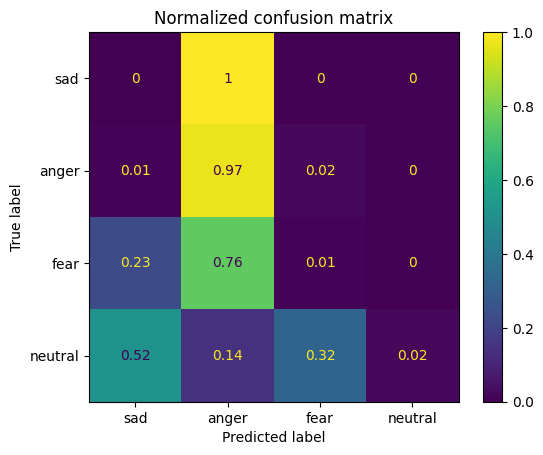

In [16]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)